# LEVEL-1
## Task 1: Data Exploration and Preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('Dataset .csv')

In [3]:
# Check the shape of the dataset
print(f"The shape of the dataset is: {df.shape}")
print(f"The dataset consists of: {df.size} items.")
print(f"The number of columns in the dataset is: {len(df.columns)}")
print(f"The number of rows in the dataset is: {len(df)}")

The shape of the dataset is: (9551, 21)
The dataset consists of: 200571 items.
The number of columns in the dataset is: 21
The number of rows in the dataset is: 9551


In [4]:
# Check for missing values
print(df.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
# Drop rows with missing values in the 'Cuisines' column
df.dropna(subset=['Cuisines'], axis=0, inplace=True)

In [6]:
# Check data types
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [7]:
# Analyze the distribution of the target variable ("Aggregate rating")
print(df['Aggregate rating'].describe())


count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


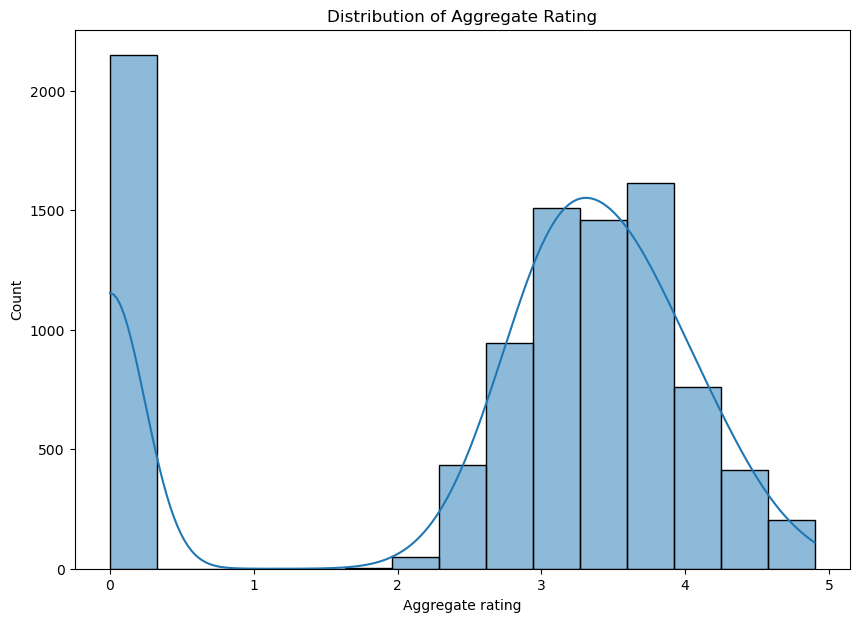

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10,7))
sns.histplot(df['Aggregate rating'], bins=15, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.show()

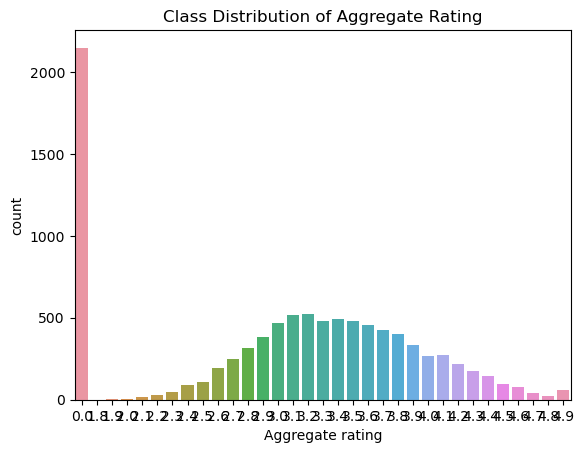

In [9]:
sns.countplot(x='Aggregate rating', data=df)
plt.title('Class Distribution of Aggregate Rating')
plt.show()


In [10]:
# Calculate class imbalance
target_variable = df["Aggregate rating"].value_counts()
class_imbalance = target_variable / target_variable.sum()
print("Class Imbalance:")
print(class_imbalance)


Class Imbalance:
0.0    0.225110
3.2    0.054706
3.1    0.054391
3.4    0.051876
3.3    0.050618
3.5    0.050304
3.0    0.049046
3.6    0.047998
3.7    0.044750
3.8    0.041815
2.9    0.039929
3.9    0.034794
2.8    0.033012
4.1    0.028715
4.0    0.027877
2.7    0.026200
4.2    0.023161
2.6    0.020017
4.3    0.018235
4.4    0.014986
2.5    0.011528
4.5    0.009956
2.4    0.009118
4.6    0.008174
4.9    0.006393
2.3    0.004926
4.7    0.004297
2.2    0.002830
4.8    0.002620
2.1    0.001572
2.0    0.000734
1.9    0.000210
1.8    0.000105
Name: Aggregate rating, dtype: float64


## Task 2: Descriptive Analysis

In [11]:
# Calculate basic statistical measures for numerical columns
num_col = df.select_dtypes(include='number')
print(num_col.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [12]:
# Explore the distribution of categorical variables
for column in df.select_dtypes(include='object'):
    val_count = df[column].value_counts()
    print(f"\nDistribution of {column}:")
    print(val_count)


Distribution of Restaurant Name:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64

Distribution of City:
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64

Distribution of Address:
Dilli Haat, INA, New Delhi                                                   11
Sector 41, Noida                                                             11
Greater Kailash (GK) 1, New Delhi                                          

In [13]:
# Identify top cities and cuisines with the highest number of restaurants
top_cities = df['City'].value_counts().nlargest(10)
print("Top 10 cities with the most restaurants:")
print(top_cities)

Top 10 cities with the most restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: City, dtype: int64


In [14]:
top_cuisines = df['Cuisines'].value_counts().nlargest(10)
print("Top 10 cuisines with the most restaurants:")
print(top_cuisines)

Top 10 cuisines with the most restaurants:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


## Task 3: Data Visualization

In [15]:
import plotly.express as px

In [16]:
# Visualize the distribution of restaurants across different cities or countries
country_dis = df["Country Code"].value_counts()
print("Distribution of restaurants across countries:")
print(country_dis)


Distribution of restaurants across countries:
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


In [17]:
city_dis = df["City"].value_counts()
print("Distribution of restaurants across cities:")
print(city_dis)

Distribution of restaurants across cities:
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64


In [18]:
# Visualize the location of restaurants and their ratings
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', hover_name='Restaurant Name', hover_data=['City', 'Cuisines'], zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [19]:
# Visualize the correlation between restaurant location and ratings
fig = px.scatter(df, x="Longitude", y="Latitude", color="Aggregate rating", hover_name="Restaurant Name")
fig.update_layout(title="Scatter plot vs rating", xaxis_title="Longitude", yaxis_title="Latitude")
fig.show()

In [20]:
# Calculate correlation
cor = df[['Latitude','Longitude','Aggregate rating']].corr()
print("Correlation between Latitude, Longitude, and Aggregate rating:")
print(cor)

Correlation between Latitude, Longitude, and Aggregate rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.045415          0.000197
Longitude         0.045415   1.000000         -0.114733
Aggregate rating  0.000197  -0.114733          1.000000


In [21]:
# Determine the percentage of restaurants that offer table booking and online delivery
table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)

print("Percentage of restaurants offering table booking:")
print(table_booking_percentage)

print("\nPercentage of restaurants offering online delivery:")
print(online_delivery_percentage)





Percentage of restaurants offering table booking:
No     87.86
Yes    12.14
Name: Has Table booking, dtype: float64

Percentage of restaurants offering online delivery:
No     74.31
Yes    25.69
Name: Has Online delivery, dtype: float64


In [22]:
# Compare the average ratings of restaurants with table booking and those without
average_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("\nAverage rating of restaurants with table booking:", average_rating_with_table_booking)
print("Average rating of restaurants without table booking:", average_rating_without_table_booking)



Average rating of restaurants with table booking: 3.4419689119170984
Average rating of restaurants without table booking: 2.557955629770992


In [23]:
# Analyze the availability of online delivery among restaurants with different price ranges
online_delivery_price_ranges = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("\nAvailability of online delivery among restaurants with different price ranges:")
print(online_delivery_price_ranges)


Availability of online delivery among restaurants with different price ranges:
Has Online delivery        No       Yes
Price range                            
1                    0.842046  0.157954
2                    0.586894  0.413106
3                    0.707473  0.292527
4                    0.909556  0.090444


# LEVEL:2
## Task 1: Table Booking and Online Delivery

In [24]:
# Determine the percentage of restaurants that offer table booking and online delivery
table_booking_percentage = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("Percentage of restaurants offering table booking:")
print(table_booking_percentage)
print("\nPercentage of restaurants offering online delivery:")
print(online_delivery_percentage)

Percentage of restaurants offering table booking:
No     87.86
Yes    12.14
Name: Has Table booking, dtype: float64

Percentage of restaurants offering online delivery:
No     74.31
Yes    25.69
Name: Has Online delivery, dtype: float64


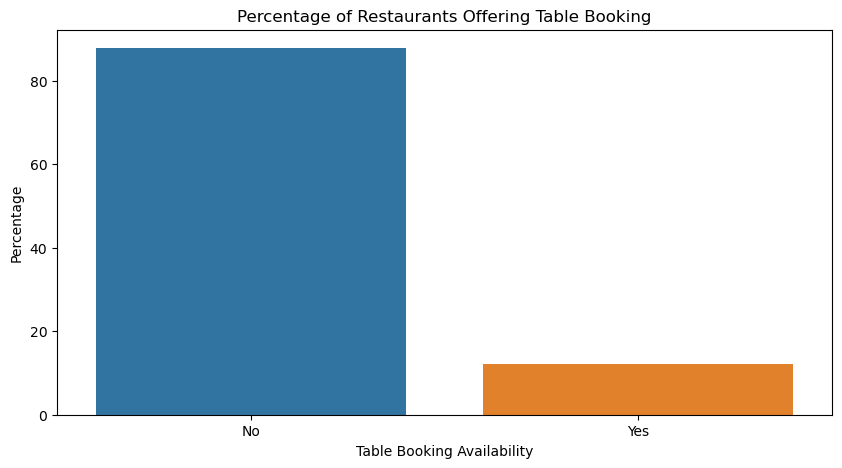

In [25]:
# Plotting the percentage of restaurants offering table booking
plt.figure(figsize=(10, 5))
sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values)
plt.title("Percentage of Restaurants Offering Table Booking")
plt.xlabel("Table Booking Availability")
plt.ylabel("Percentage")
plt.show()

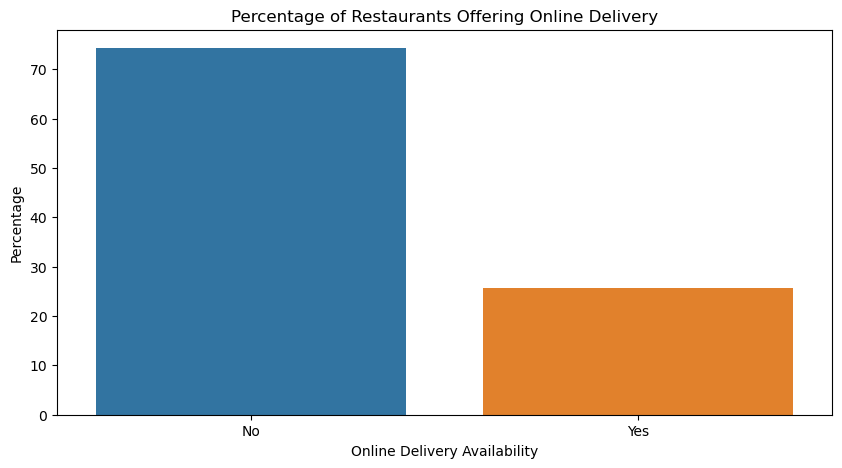

In [26]:
# Plotting the percentage of restaurants offering online delivery
plt.figure(figsize=(10, 5))
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values)
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.xlabel("Online Delivery Availability")
plt.ylabel("Percentage")
plt.show()

In [27]:
# Compare the average ratings of restaurants with table booking and those without
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean().round(2)
print("\nAverage rating of restaurants with and without table booking:")
print(avg_rating_table_booking)


Average rating of restaurants with and without table booking:
Has Table booking
No     2.56
Yes    3.44
Name: Aggregate rating, dtype: float64


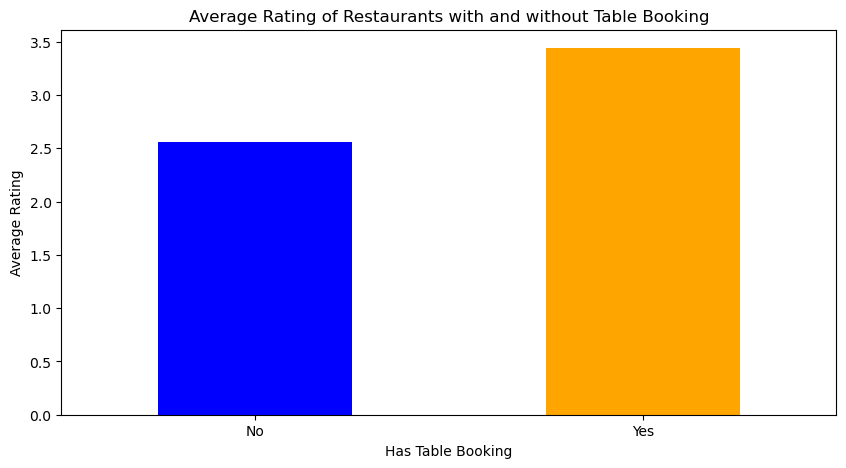

In [28]:
# Plotting the average ratings of restaurants with and without table booking
plt.figure(figsize=(10, 5))
avg_rating_table_booking.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Rating of Restaurants with and without Table Booking")
plt.xlabel("Has Table Booking")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

In [29]:
# Analyze the availability of online delivery among restaurants with different price ranges
online_delivery_by_price_range = df.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)
print("\nAvailability of online delivery among restaurants with different price ranges:")
print(online_delivery_by_price_range)


Availability of online delivery among restaurants with different price ranges:
Has Online delivery    No   Yes
Price range                    
1                    3737   701
2                    1827  1286
3                     994   411
4                     533    53


<Figure size 1000x500 with 0 Axes>

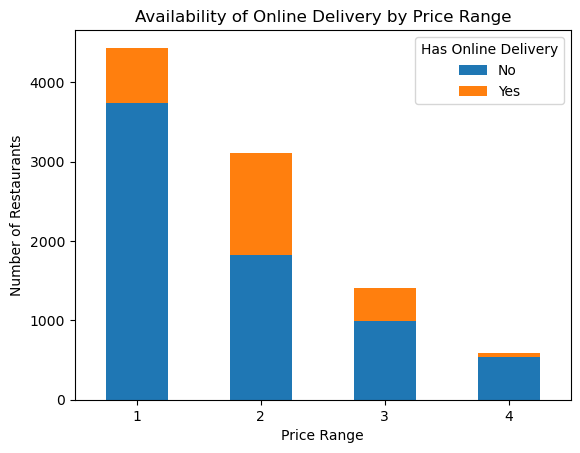

In [30]:
# Plotting the availability of online delivery among restaurants with different price ranges
plt.figure(figsize=(10, 5))
online_delivery_by_price_range.plot(kind='bar', stacked=True)
plt.title("Availability of Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.legend(title="Has Online Delivery", loc='upper right')
plt.xticks(rotation=0)
plt.show()


## Task 2: Price Range Analysis

In [31]:
# Determine the most common price range among all the restaurants
most_common_price_range = df['Price range'].mode()[0]
print("\nMost common price range among all restaurants:", most_common_price_range)



Most common price range among all restaurants: 1


In [32]:
# Calculate the average rating for each price range
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().round(2)
print("\nAverage rating for each price range:")
print(avg_rating_by_price_range)


Average rating for each price range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


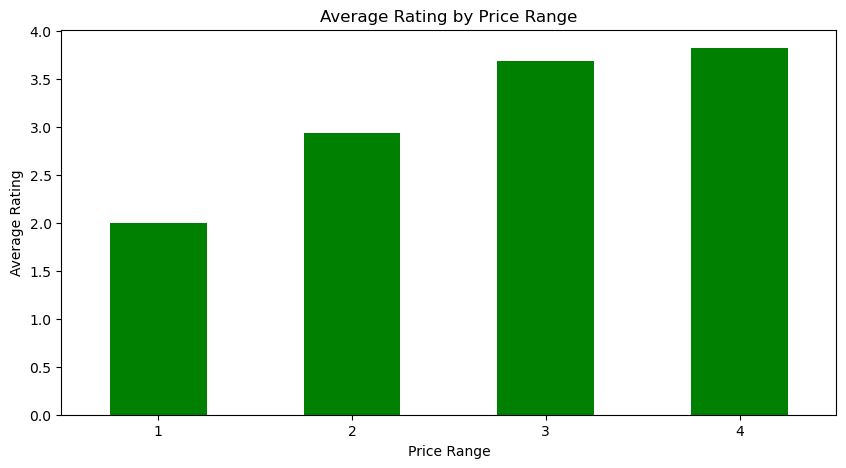

In [33]:
# Plotting the average rating for each price range
plt.figure(figsize=(10, 5))
avg_rating_by_price_range.plot(kind='bar', color='green')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()


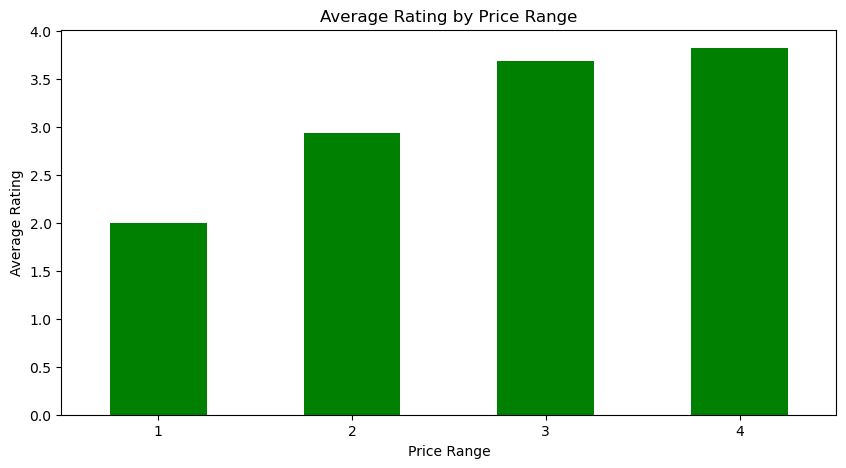

In [34]:
# Plotting the average rating for each price range
plt.figure(figsize=(10, 5))
avg_rating_by_price_range.plot(kind='bar', color='green')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()

In [35]:
# Identify the color that represents the highest average rating among different price ranges
highest_avg_rating_color = avg_rating_by_price_range.idxmax()
print("\nColor representing the highest average rating among different price ranges:", highest_avg_rating_color)


Color representing the highest average rating among different price ranges: 4


## Task 3: Feature Engineering

In [36]:
# Extract additional features from existing columns
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [37]:
# Create new features by encoding categorical variables
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [38]:
# Display the modified DataFrame
print("\nModified DataFrame with additional features:")
print(df.head())


Modified DataFrame with additional features:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shang

In [39]:
cuisines_column = df['Cuisines']

# Get all unique values in the 'Cuisines' column
unique_cuisines = cuisines_column.unique()

# Display all unique cuisines
print(unique_cuisines)

['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [40]:
City_column = df['City']

# Get all unique values in the 'City' column
unique_City = City_column.unique()

# Display all unique cuisines
print(unique_City)

['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Monroe' 'Montville' 'Ojo Caliente'
 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola' 'Phillip Island'
 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii' 'Savannah' 'Singapore'
 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East' 'Valdosta' 'Vernonia'
 'Victor Harbor' 'Vineland Station' 'Waterloo' 'Weirton' 'Winchester Bay'
 'Yorkton' 'Abu Dhabi' 'Dubai' 'Sharjah' 'Agra' 'Ahmedabad' 'All

# Level-3

## Task 1: Predictive Modeling

In [41]:
# Import necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Switch to order menu Price range  \
0        French, Japanese, Desserts  ...                    No           3   
1                          Japanese  ...                    No           3   
2  Seafood, Asian, Filipino, Indian  ...                    No           4   
3                   Japanese, Sushi  ...                    No           4   
4                  Japanese, Korean  ...                    No           4   

  Aggregate rating Rating color Rating text Votes  Restaurant Name Length  \
0              4.8   Dark Green   Excellent   314                      16   
1              4.5   Dark Green   Excellent   591                      16   
2              4.4        Green   Very Good   270                      22   
3              4.9   Dark Green   Excellent   365                       4   
4              4.8   Dark Green   Excellent   229                      11   

   Address Length Has Table Booking Has Online Delivery  
0              71                 1                   0  
1              67                 1                   0  
2              56                 1                   0  
3              70                 0                   0  
4              64                 1                   0  

[5 rows x 25 columns]

In [43]:
# Split data into features and target variable
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [44]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

In [45]:
# Create transformation for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64','float64']).columns
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [46]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
     transformers=[
         ('num',numeric_transformer,numeric_features),
         ('cat', categorical_transformer,categorical_features)
     ])

In [47]:
# Spliting the dataset into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Defining the model
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [49]:
# Building a pipeline with preprocessing and model
pipelines = {}

for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [50]:
# Training and evaluating models
results = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}


In [51]:
# Displaying results
print("Model Evaluation Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"MSE: {result['MSE']:.2f}")
    print(f"R2 Score: {result['R2 Score']:.2f}")
    print()

Model Evaluation Results:
Linear Regression:
MSE: 1.67
R2 Score: 0.27

Decision Tree:
MSE: 0.05
R2 Score: 0.98

Random Forest:
MSE: 0.03
R2 Score: 0.99



## Task 2: Customer Preference Analysis

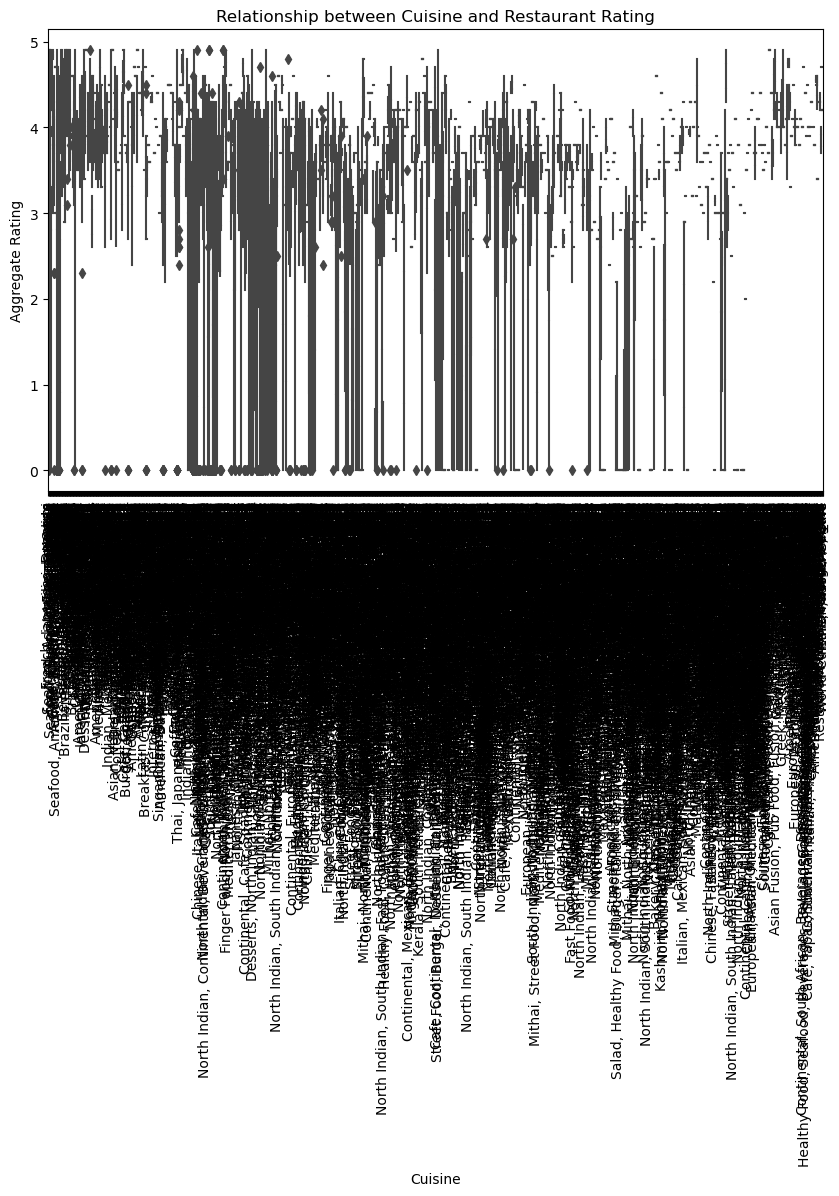

In [52]:
# Analyzing the relationship between cuisine and restaurant rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.title("Relationship between Cuisine and Restaurant Rating")
plt.xlabel("Cuisine")
plt.ylabel("Aggregate Rating")
plt.show()

In [53]:
# Identifying the most popular cuisines among customers based on the number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)
print("\nTop 10 most popular cuisines based on number of votes:")
print(top_cuisines)


Top 10 most popular cuisines based on number of votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [54]:
# Determining if there are any specific cuisines that tend to receive higher ratings
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage rating for each cuisine:")
print(avg_rating_by_cuisine.head(10))


Average rating for each cuisine:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


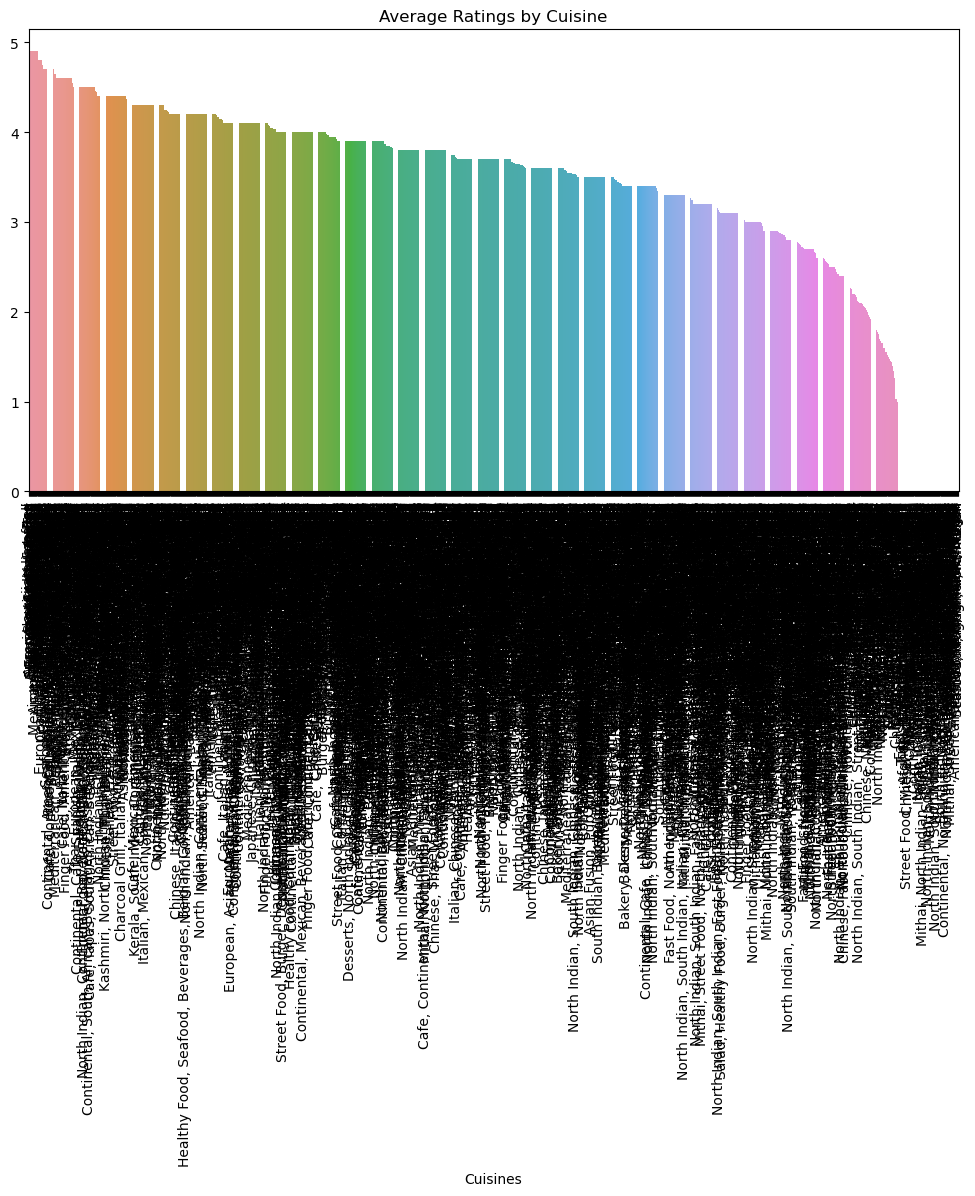

In [55]:
# Visualize the average ratings by cuisine
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_by_cuisine.index, y= avg_rating_by_cuisine.values)
plt.xticks(rotation=90)
plt.title('Average Ratings by Cuisine')
plt.show()

## Task 3: Data Visualization

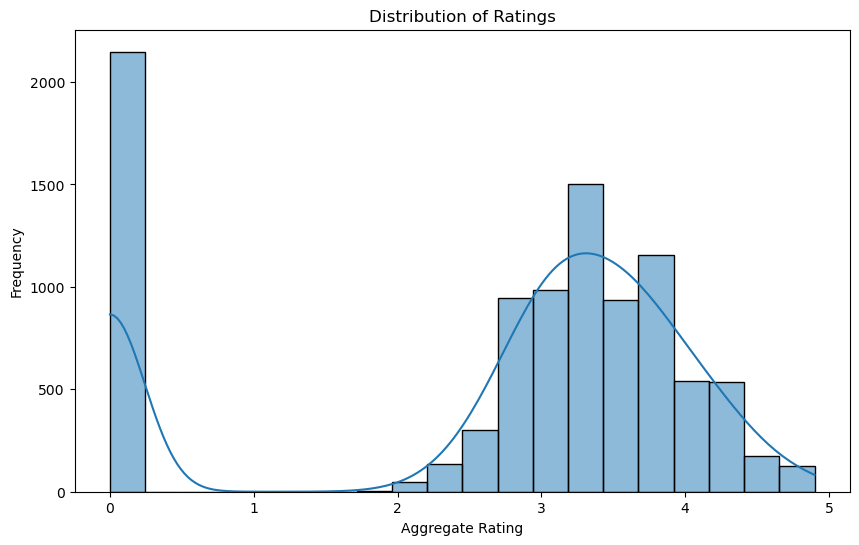

In [56]:
# Visualizing the distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

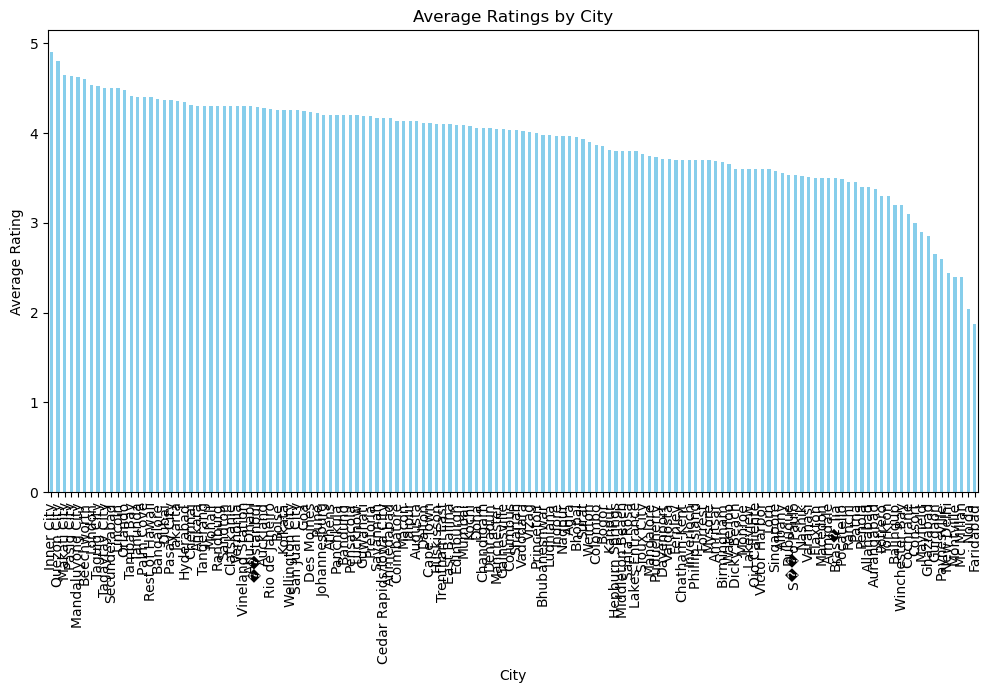

In [57]:
# Comparing the average ratings of different cities using a bar plot
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_rating_by_city.plot(kind='bar', color='skyblue')
plt.title("Average Ratings by City")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

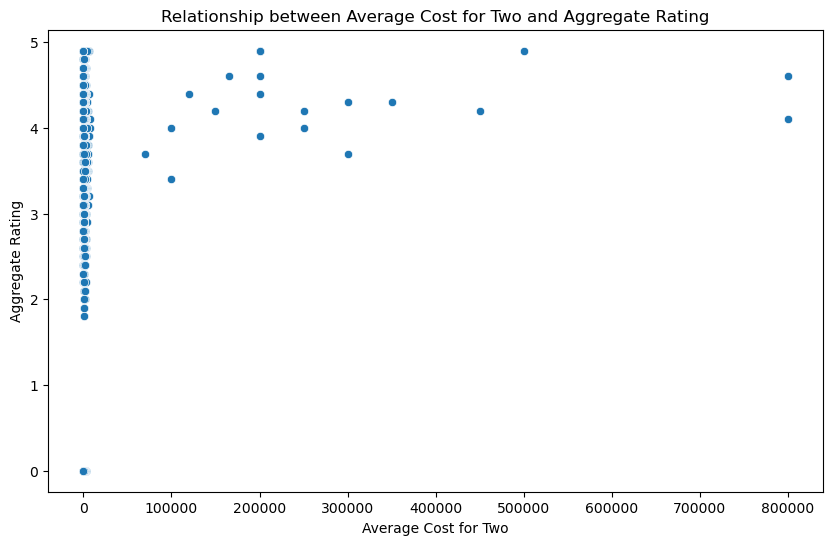

In [58]:
# Visualizing the relationship between various features and the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title("Relationship between Average Cost for Two and Aggregate Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()